# Import Modules Required

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Importing Dataset

In [2]:
fruits = pd.read_table('fruit_data_with_colors.txt')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


***

Create a dictionary which maps the fruit_label column of dataset to fruit_name column of the dataset

In [3]:
map_fruits = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))
# Takes unique fruit_labels as index and corresponding unique fruit_names as their values
map_fruits

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

***

# Scatter Plot

Here number of features are four, those are mass, width, height and color_score. Lets draw scatter plot of those features corresponding to the dataset

In [4]:
from matplotlib import cm

X = fruits[['mass', 'width', 'height', 'color_score']]     # Features
y = fruits['fruit_label']                                  # Label

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) # Splits the dataset into 75%(train) and 25%(test)

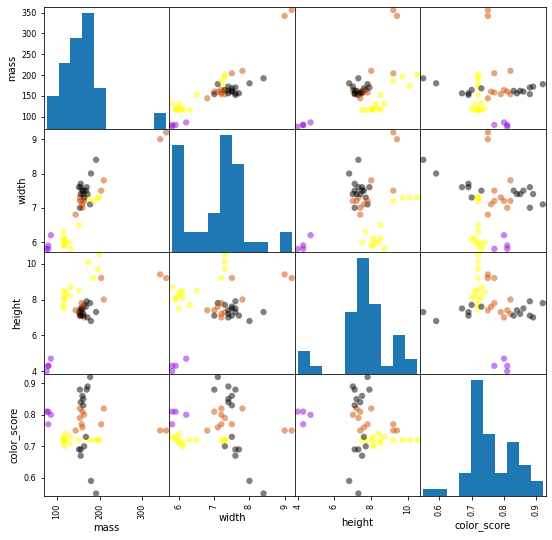

In [5]:
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c = y_train, marker = 'o', s = 40, figsize = (9, 9), cmap = cmap)

Lets Draw 3D scatter plot

<function matplotlib.pyplot.show(*args, **kw)>

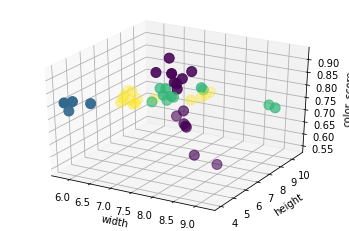

In [6]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker = 'o', s = 100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show

***

# Create Classifier

We have already split the dataset into two, trainset and testset. In this problem, we are going to use k-Nearest Neighbours (kNN) classifer.

In [7]:
from sklearn.neighbors import KNeighborsClassifier  # Import classifier module 

knn = KNeighborsClassifier(n_neighbors = 1)         # Create classifer object with desired value of k

Train the model

In [8]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

Estimate the accuracy on testset

In [9]:
knn.score(X_test, y_test)

0.6

We can see the accuracy of the model is not so good on the testset. We need to select a better k value.

Note: kNN classifier with k = 1 is the overfitted model.

***

# Plot Decision Boundaries of this model

In [10]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import matplotlib.patches as mpatches

def plot_fruit_knn(X, y, n_neighbors, weights):
    X_mat = X[['height', 'width']].values
    y_mat = y.values
# Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)
# Plot the decision boundary by assigning a color in the color map
    # to each mesh point.

    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50

    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
    patch2 = mpatches.Patch(color='#0000FF', label='orange')
    patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])

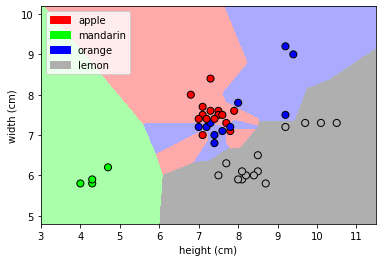

In [11]:
plot_fruit_knn(X_train, y_train, 1, 'uniform')
plt.xlabel('height (cm)')
plt.ylabel('width (cm)')
plt.show()

***

***

Lets try different value of k for better prediction.
Let k = 5

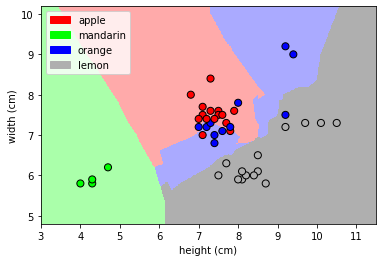

In [12]:
plot_fruit_knn(X_train, y_train, 5, 'uniform')
plt.xlabel('height (cm)')
plt.ylabel('width (cm)')
plt.show()

Lets train the model and test its accuracy

In [13]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.5333333333333333

Still the accuracy is not so good. So, lets take another method for finding the best k.

# Finding the best k

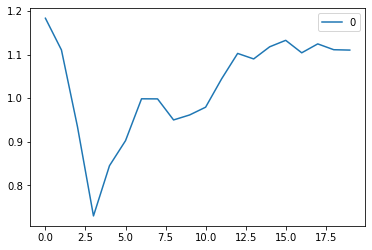

In [14]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

***

***

Let's take k = 3 as error is minimum there

In [15]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.5333333333333333

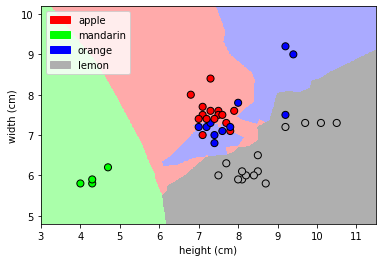

In [16]:
plot_fruit_knn(X_train, y_train, 3, 'uniform')
plt.xlabel('height (cm)')
plt.ylabel('width (cm)')
plt.show()

Lets take k = 6

In [18]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.6

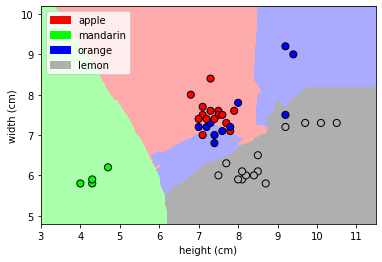

In [19]:
plot_fruit_knn(X_train, y_train, 6, 'uniform')
plt.xlabel('height (cm)')
plt.ylabel('width (cm)')
plt.show()

***

# Prediction

In [20]:
#Predict with respect to an unknown feature set.
fruit_pred = knn.predict([[150, 7.4, 4.6, 0.58]])
map_fruits[fruit_pred[0]]

'apple'

Try once more

In [21]:
fruit_pred = knn.predict([[200, 7.5, 7.5, 0.72]])
map_fruits[fruit_pred[0]]

'lemon'

***

# Accuracy

In [22]:
y_hat = knn.predict(X_test)
y_hat[0:5]                                # Predicted outputs

array([3, 3, 4, 4, 1], dtype=int64)

In [23]:
y_test[0:5]                               # Testset outputs

26    3
35    3
43    4
28    3
11    1
Name: fruit_label, dtype: int64

Import $metrics module

In [24]:
from sklearn import metrics

In [25]:
accuracy = metrics.accuracy_score(y_test, y_hat)
accuracy

0.6

***

Here, we have created a Fruit Prediction System based on kNN classifier. The accuracy of the system is 0.6 i.e. 60%.

***